# Import Packages

In [1]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline 

### Yelp academic challenge data (subset and tweaked for the purposes of example)
https://github.com/vc1492a/Yelp-Challenge-Dataset

In [3]:
yelp = pd.read_csv('data/yelp.csv')

# Data Organization

In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57795 entries, 0 to 57794
Data columns (total 10 columns):
business_id           57795 non-null object
city                  57794 non-null object
name                  57795 non-null object
review_count          57795 non-null int64
stars                 57795 non-null float64
state                 57795 non-null object
price_range           32757 non-null float64
number_of_checkins    57795 non-null int64
category              16080 non-null object
restaurant            57065 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 4.4+ MB


In [5]:
yelp.head()

,business_id,city,name,review_count,stars,state,price_range,number_of_checkins,category,restaurant
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,Mr Hoagie,4,4.5,PA,1.0,0,Fast Food,1.0
1,UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,Clancy's Pub,4,3.5,PA,1.0,0,Nightlife,0.0
2,3eu6MEFlq2Dg7bQh8QbdOg,Dravosburg,Joe Cislo's Auto,3,5.0,PA,NaN,0,NaN,0.0
3,cE27W9VPgO88Qxe4ol6y_g,Bethel Park,Cool Springs Golf Center,5,2.5,PA,NaN,9,NaN,0.0
4,HZdLhv6COCleJMo7nPl-RA,Pittsburgh,Verizon,5,2.5,PA,2.0,0,NaN,0.0


# Data Exploration

### How many businesses are restaurants?

In [6]:
yelp.restaurant.sum()

11366.0

### Slice: Let's look only at restaurants

In [7]:
yelp = yelp.loc[yelp.restaurant==1, :]

### Where are the reviews located?

In [8]:
yelp.state.value_counts()

AZ    5015
NV    3208
NC    1319
PA     944
WI     619
IL     188
SC      73
Name: state, dtype: int64

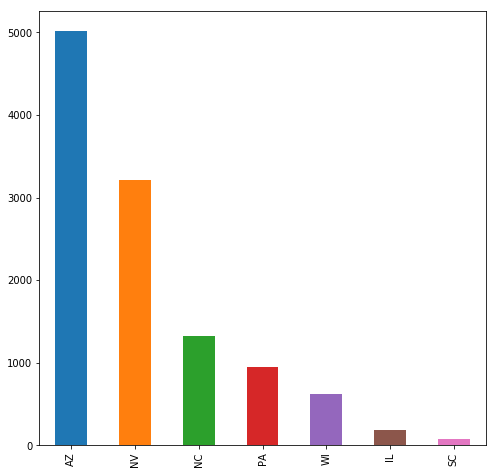

In [9]:
yelp.state.value_counts().plot(kind='bar', figsize=(8,8))

### What categories of restaurants are there?

In [10]:
yelp.category.value_counts()

Mexican                   1645
Pizza                     1202
Chinese                    956
Sandwiches                 695
American (Traditional)     649
Fast Food                  599
American (New)             583
Italian                    468
Food                       426
Burgers                    339
Barbeque                   292
Thai                       260
Breakfast & Brunch         241
Seafood                    228
Japanese                   211
Vietnamese                 143
Indian                     135
Sushi Bars                 107
Mediterranean              104
Asian Fusion                92
Diners                      89
Greek                       75
Korean                      63
Vegetarian                  51
Middle Eastern              46
Nightlife                   28
Pakistani                    3
Pizzza                       3
Name: category, dtype: int64

### Bad data! Fix 'Pizzza'

In [11]:
yelp.loc[yelp.category=='Pizzza', 'category'] = 'Pizza'

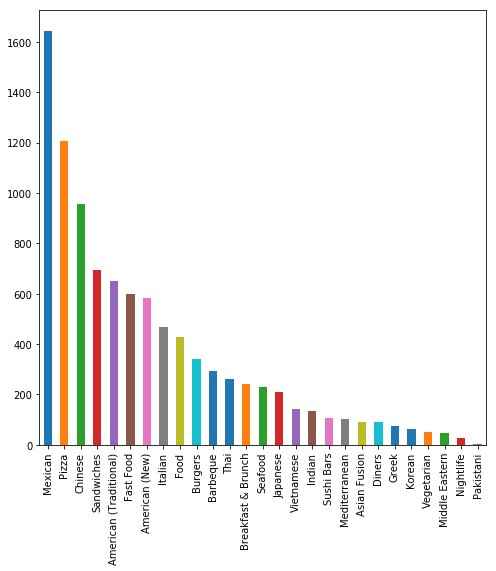

In [12]:
yelp.category.value_counts().plot(kind='bar', figsize=(8,8))

### Combine: Add in population data from the US Census
https://www.census.gov/data/tables/2016/demo/popest/total-cities-and-towns.html

In [15]:
pop = pd.read_csv('data/2016PopulationData.csv')

In [16]:
pop.head()

,GEO.id,GEO.id2,GEO.display-label,GC_RANK.target-geo-id,GC_RANK.target-geo-id2,GC_RANK.rank-label,GC_RANK.display-label,GC_RANK.display-label.1,rescensus42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,0100000US,NaN,United States,1620000US3651000,3651000,1,"United States - New York city, New York","New York city, New York",8175133.0,8174962,8192026,8284098,8361179,8422460,8471990,8516502,8537673
1,0100000US,NaN,United States,1620000US0644000,644000,2,"United States - Los Angeles city, California","Los Angeles city, California",3792621.0,3792584,3796292,3825393,3858137,3890436,3920173,3949149,3976322
2,0100000US,NaN,United States,1620000US1714000,1714000,3,"United States - Chicago city, Illinois","Chicago city, Illinois",2695598.0,2695620,2697736,2705404,2714120,2718887,2718530,2713596,2704958
3,0100000US,NaN,United States,1620000US4835000,4835000,4,"United States - Houston city, Texas","Houston city, Texas",2099451.0,2100277,2105625,2132157,2166458,2204406,2243999,2284816,2303482
4,0100000US,NaN,United States,1620000US0455000,455000,5,"United States - Phoenix city, Arizona","Phoenix city, Arizona",1445632.0,1447624,1450629,1469353,1499007,1525562,1554179,1582904,1615017


### Uh Oh! Labels for city and state don't match

In [17]:
print(yelp.city.head())
print(pop['GC_RANK.display-label.1'].head())

0     Dravosburg
15      Carnegie
20      Carnegie
22      Carnegie
24    Pittsburgh
Name: city, dtype: object
0         New York city, New York
1    Los Angeles city, California
2          Chicago city, Illinois
3             Houston city, Texas
4           Phoenix city, Arizona
Name: GC_RANK.display-label.1, dtype: object


#### 1. Create 'city' and 'state' variable for the census data

In [18]:
pop['city'] = pop['GC_RANK.display-label.1'].apply(lambda x: ' '.join(x.split(',')[0].split()[:-1]).strip())
pop['state'] = pop['GC_RANK.display-label.1'].apply(lambda x: x.split(',')[1].strip())

#### 2. Expand 'state' abbreviation in yelp data

In [19]:
yelp.state.unique()

array(['PA', 'NC', 'SC', 'WI', 'IL', 'AZ', 'NV'], dtype=object)

In [20]:
state_abbrev = {'PA': 'Pennsylvania', 'NC': 'North Carolina', 'SC': 'South Carolina', 'WI': 'Wisconsin', 
               'IL': 'Illinois', 'AZ': 'Arizona', 'NV': 'Nevada'}
yelp.state.replace(state_abbrev, inplace=True)
yelp.state.unique()

array(['Pennsylvania', 'North Carolina', 'South Carolina', 'Wisconsin',
       'Illinois', 'Arizona', 'Nevada'], dtype=object)

In [21]:
yelp = yelp.merge(pop[['city', 'state', 'respop72016']], on=['city', 'state'], how='left')

In [22]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11366 entries, 0 to 11365
Data columns (total 11 columns):
business_id           11366 non-null object
city                  11366 non-null object
name                  11366 non-null object
review_count          11366 non-null int64
stars                 11366 non-null float64
state                 11366 non-null object
price_range           10780 non-null float64
number_of_checkins    11366 non-null int64
category              9733 non-null object
restaurant            11366 non-null float64
respop72016           10288 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.0+ MB


### What did we just do? Entity resolution.

# Inferential statistics

In [23]:
yelp.describe()

,review_count,stars,price_range,number_of_checkins,restaurant,respop72016
count,11366.000000,11366.000000,10780.000000,11366.000000,11366.0,1.028800e+04
mean,62.447387,3.441448,1.538404,164.311103,1.0,6.365891e+05
std,163.232207,0.802070,0.637678,489.513931,0.0,4.801052e+05
min,3.000000,1.000000,1.000000,0.000000,1.0,5.453400e+04
25%,8.000000,3.000000,1.000000,10.000000,1.0,2.474770e+05
50%,21.000000,3.500000,1.000000,41.000000,1.0,6.329120e+05
75%,62.000000,4.000000,2.000000,142.000000,1.0,8.420510e+05
max,5642.000000,33.500000,4.000000,16641.000000,1.0,1.615017e+06


### Bad data! Reviews can't be greater than 5 stars

In [24]:
yelp[yelp.stars > 5]

,business_id,city,name,review_count,stars,state,price_range,number_of_checkins,category,restaurant,respop72016
105,XmdTkxKyJd7TuDLoiic1kg,Pittsburgh,Lidia's,277,33.5,Pennsylvania,3.0,261,Italian,1.0,303625.0


In [25]:
yelp.loc[yelp.stars==33.5, 'stars'] = 3.5

# Visualization

In [26]:
yelp.drop('restaurant', inplace=True, axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112c28710>,
      dtype=object)

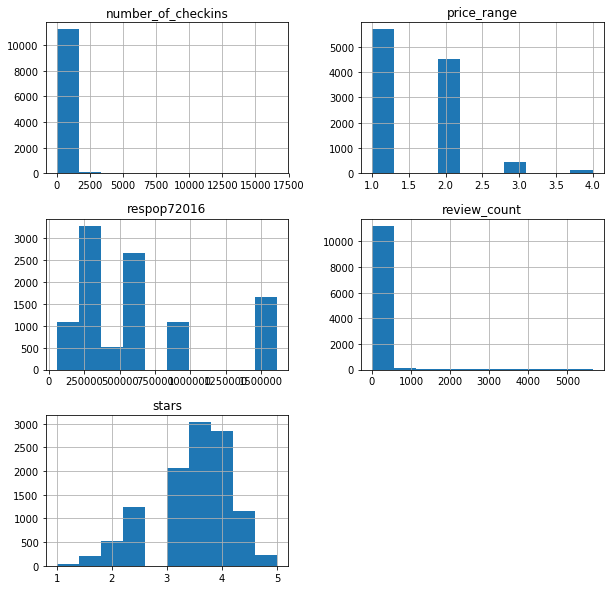

In [27]:
yelp.hist(figsize=(10,10))

### Transform
Logging can help normalize a distribution that does not contain zero<br/>
Taking the square root can help normalize a distribution that does contain zero

In [28]:
yelp['respop72016'] = np.log(yelp['respop72016'])
yelp['number_of_checkins'] = np.sqrt(yelp['number_of_checkins'])
yelp['review_count'] = np.sqrt(yelp['review_count'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112cb2cf8>,
      dtype=object)

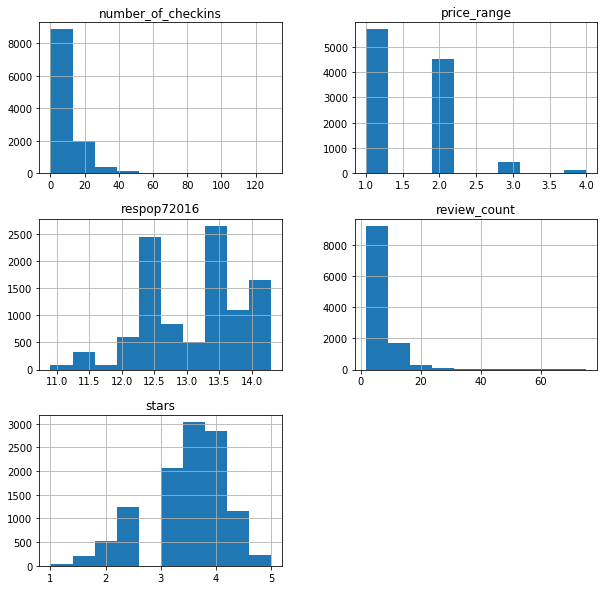

In [29]:
yelp.hist(figsize=(10,10))

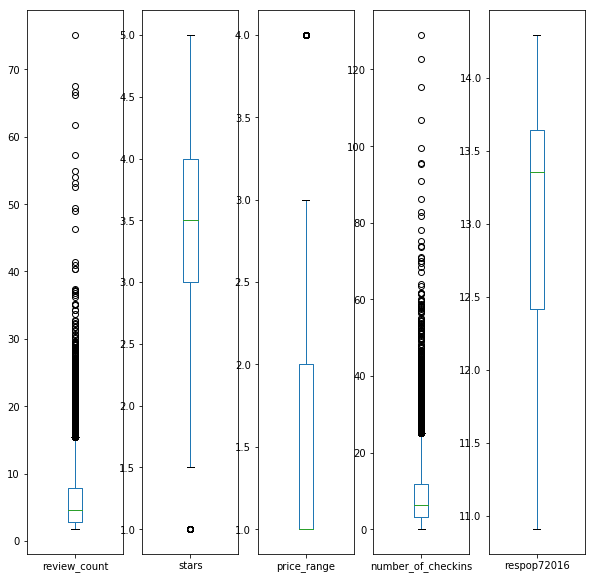

In [30]:
cols = list(yelp.select_dtypes(include=[np.number]).columns)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,10))
for i, ax in enumerate(axes.reshape(-1)):
    yelp[cols[i]].plot.box(ax=ax)

### Identify trends

/Users/brandon/anaconda/envs/ddl/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.
/Users/brandon/anaconda/envs/ddl/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


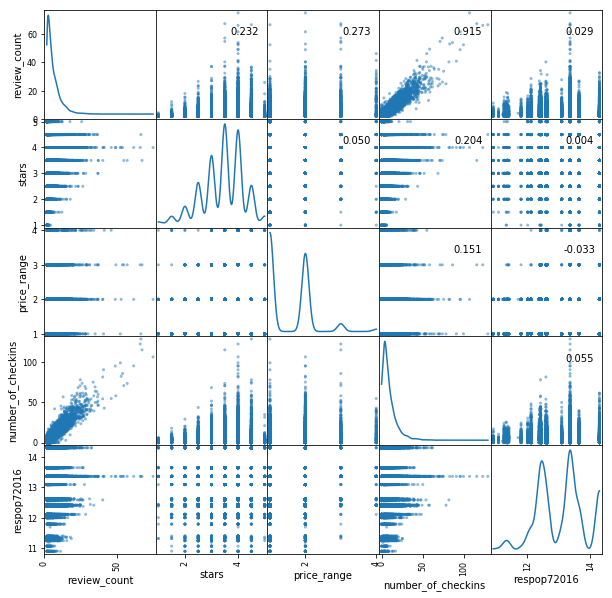

In [31]:
axes = scatter_matrix(yelp, alpha=0.5, diagonal='kde', figsize=(10,10))
corr = yelp.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

Arizona                AxesSubplot(0.1,0.679412;0.235294x0.220588)
Illinois          AxesSubplot(0.382353,0.679412;0.235294x0.220588)
Nevada            AxesSubplot(0.664706,0.679412;0.235294x0.220588)
North Carolina         AxesSubplot(0.1,0.414706;0.235294x0.220588)
Pennsylvania      AxesSubplot(0.382353,0.414706;0.235294x0.220588)
South Carolina    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
Wisconsin                  AxesSubplot(0.1,0.15;0.235294x0.220588)
dtype: object

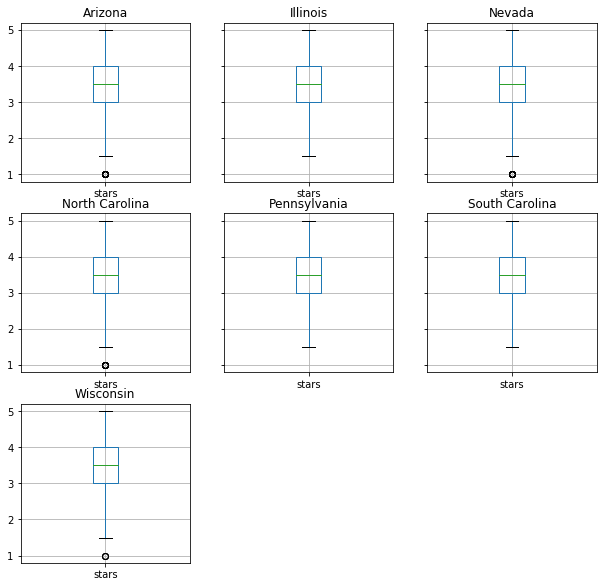

In [32]:
yelp.groupby('state').boxplot(column='stars', return_type='axes', figsize=(10,10))

In [33]:
print('Top Foods')
for key, group in yelp[yelp.stars >=4].groupby('state'):
    top = list(group.category.value_counts().index)[:3]
    print('{}:'.format(key))
    print('1. {}, 2. {}, 3. {}\n'.format(top[0], top[1], top[2]))

Top Foods
Arizona:
1. Mexican, 2. Pizza, 3. Food

Illinois:
1. Pizza, 2. Mexican, 3. Chinese

Nevada:
1. Mexican, 2. Pizza, 3. Food

North Carolina:
1. Mexican, 2. American (Traditional), 3. Sandwiches

Pennsylvania:
1. Pizza, 2. Food, 3. Sandwiches

South Carolina:
1. American (New), 2. Chinese, 3. Mexican

Wisconsin:
1. Food, 2. Pizza, 3. Mexican

